In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [29]:
df = pd.read_csv('./dataFolder/AllData_hovering.csv')

In [30]:
df.head()

,ndTE,work,cost,abdominal_mass,spring_constant,length_scale,petiole_length
0,0.647685,0.000210,41.536337,0.1,0.1,1.0,0.0
1,0.700724,0.000201,41.135751,0.1,0.1,1.0,0.0
2,0.656883,0.000205,45.212708,0.1,0.1,1.0,0.0
3,0.693074,0.000199,41.141273,0.1,0.1,1.0,0.0
4,0.672795,0.000198,40.021376,0.1,0.1,1.0,0.0


In [31]:
df_long = pd.melt(df, id_vars=['ndTE'], value_vars=['abdominal_mass', 'length_scale', 'petiole_length', 'spring_constant'],
        var_name='treatments', value_name='values')

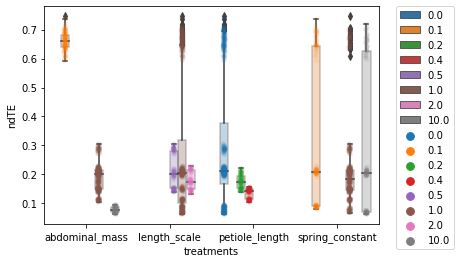

In [32]:
import seaborn as sns

sns.boxplot(x = 'treatments', y = 'ndTE', hue = 'values',
           data = df_long, boxprops=dict(alpha=.3))
sns.stripplot(x = 'treatments', y = 'ndTE', hue = 'values',
           data = df_long, dodge = True,
             alpha = 0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.savefig('./dataFolder/boxPlots_bytreatments.png', bbox_inches = 'tight')

In [33]:
# plot only the Mechanical work plot for the abdominal mass and spring constant

subset = df.loc[(df['petiole_length'] == 0) & (df['length_scale'] == 1), :]

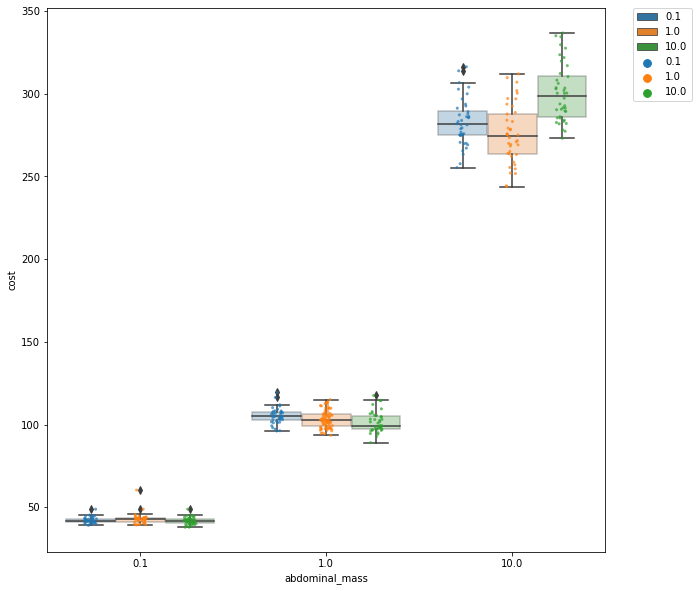

In [38]:
f, ax = plt.subplots(figsize = (10,10))

sns.boxplot(x = 'abdominal_mass', y = 'cost', hue = 'spring_constant',
           data = subset, boxprops=dict(alpha=.3), ax = ax)
sns.stripplot(x = 'abdominal_mass', y = 'cost', hue = 'spring_constant',
           data = subset, dodge = True, size = 3,
             alpha = 0.7, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

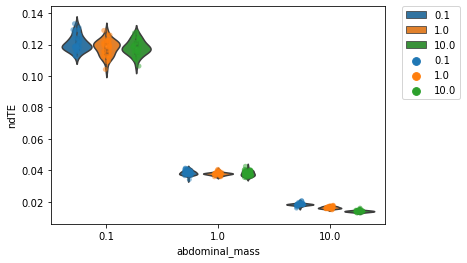

In [24]:
sns.violinplot(x = 'abdominal_mass', y = 'ndTE', hue = 'spring_constant',
           data = subset, boxprops=dict(alpha=.2))
sns.stripplot(x = 'abdominal_mass', y = 'ndTE', hue = 'spring_constant',
           data = subset, dodge = True,
             alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
dependent_variables = ['length_scale', 'petiole_length', 'abdo_mass', 'torsional_spring']

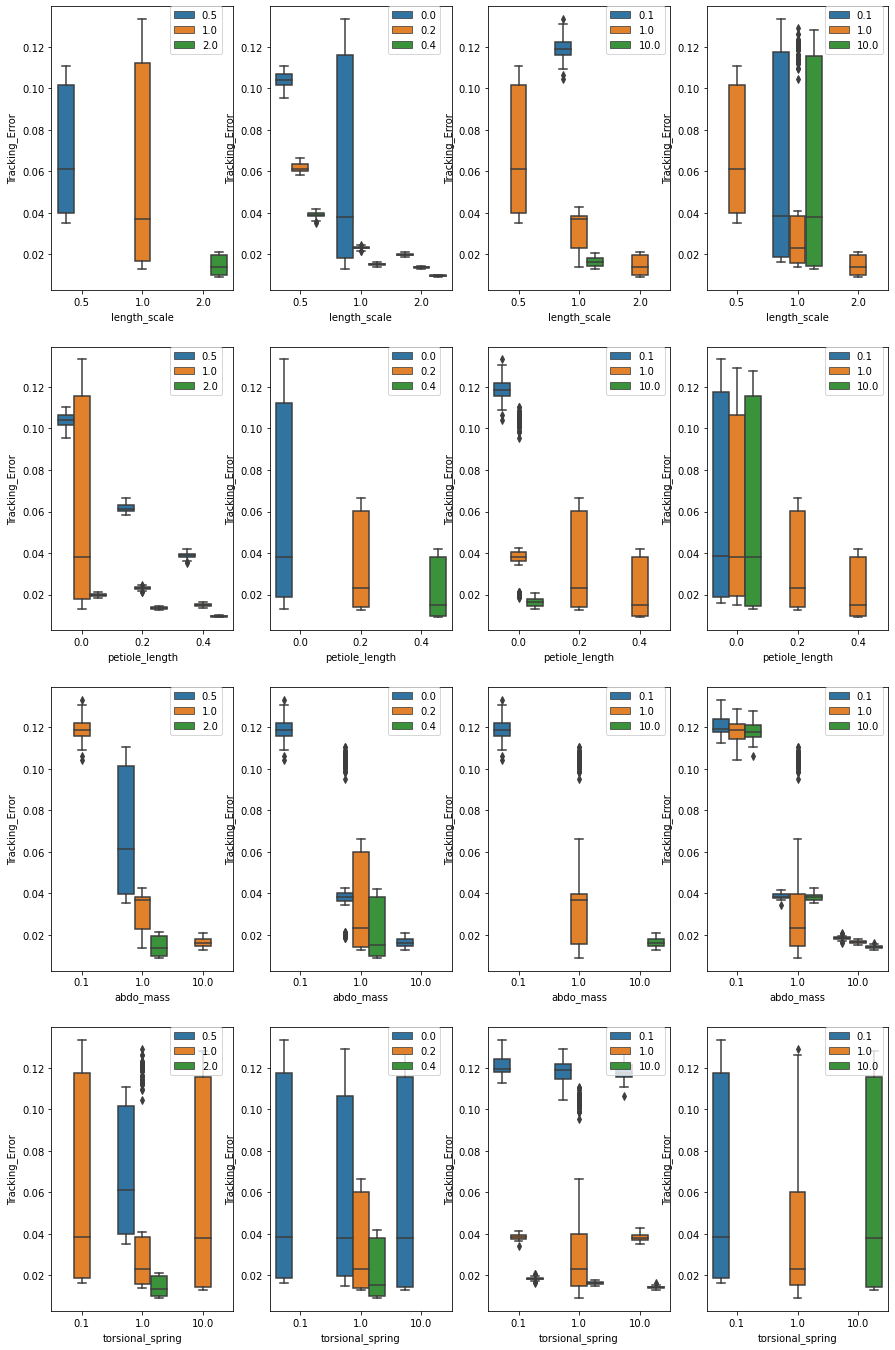

In [40]:
f, ax = plt.subplots(4,4, figsize = (15, 6*4))
ax = ax.ravel()

i=0
for v in dependent_variables:
    for h in dependent_variables:
        sns.boxplot(x = v, y = 'Tracking_Error', hue = h,
               data = df, ax = ax[i])
#                     , boxprops=dict(alpha=.3))
#         sns.stripplot(x = v, y = 'Tracking_Error', hue = h,
#                data = df, ax = ax[i], dodge = True,
#              alpha = 0.1)
        ax[i].legend(bbox_to_anchor=(0.65, 1), loc=2, borderaxespad=0.)
        i+=1
plt.savefig('./dataFolder/boxPlots_gridBytreatments.pdf')

In [22]:
i

1

<AxesSubplot:xlabel='petiole_length', ylabel='Tracking_Error'>

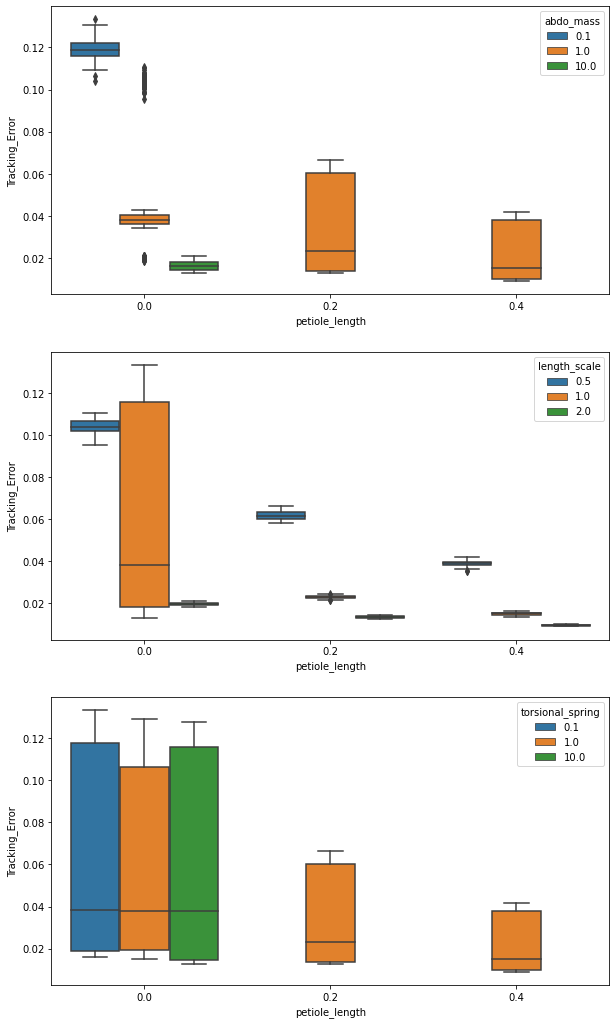

In [16]:
f, ax = plt.subplots(3,1, figsize = (10,6*3))
ax = ax.ravel()

sns.boxplot(x = 'petiole_length', y = 'Tracking_Error', hue = 'abdo_mass',
               data = df, ax = ax[0])
sns.boxplot(x = 'petiole_length', y = 'Tracking_Error', hue = 'length_scale',
               data = df, ax = ax[1])
sns.boxplot(x = 'petiole_length', y = 'Tracking_Error', hue = 'torsional_spring',
               data = df, ax = ax[2])

In [ ]:
# check for "gamma" distributions

dist = df_long[(df_long['treatments'] == 'abdo_mass') & (df_long['values'] == 10.0)]['Tracking_Error']
print(np.mean(dist))
np.mean(dist) - 2*np.std(dist)

In [ ]:
dist = df_long[(df_long['treatments'] == 'length_scale') & (df_long['values'] == 2.0)]['Tracking_Error']
print(np.mean(dist))
np.mean(dist) - 2*np.std(dist)